In [90]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community.centrality import girvan_newman
import networkx.algorithms.community as nx_comm
import numpy as np
from scipy.spatial import distance

import torch
from typing import Tuple



## Create Graph


In [91]:
def plot(G):
    options = {
        'node_size': 500,
        'width': 2,
        'font_weight': 'bold',
        'font_color': 'white'
    }
    fig, ax = plt.subplots(figsize=(6, 4))
    nx.draw(G, with_labels=True, **options, ax=ax)

    
def create_undirected_graph(edge_list):
    G = nx.Graph()
    G.add_edges_from(edge_list)
    N, E = G.number_of_nodes(), G.number_of_edges()
    
    print('Number of Nodes, ', N)
    print('Number of Edges, ', E)
    print('Avg of Degree, ', 2*E/N)

    plot(G)

    return G

def create_directed_graph(edge_list):
    G = nx.DiGraph()
    G.add_edges_from(edge_list)
    N, E = G.number_of_nodes(), G.number_of_edges()
    
    print('Number of Di Nodes, ', N)
    print('Number of Di Edges, ', E)
    print('Avg of Degree, ', 2*E/N)

    plot(G)

    return G

def cal_community(G):
    communities = girvan_newman(G)

    node_groups = []
    for com in next(communities):
        node_groups.append(list(com))

    return node_groups


def cal_adj_matrix(G):
    A = nx.adjacency_matrix(G)
    
    return A.todense()



## 1. Closeness Centrality for nodes

Number of Nodes,  8
Number of Edges,  9
Avg of Degree,  2.25
Closeness nx 
 {'1': 0.7, '2': 0.4666666666666667, '3': 0.4666666666666667, '4': 0.4375, '5': 0.6363636363636364, '6': 0.5384615384615384, '7': 0.4666666666666667, '8': 0.3333333333333333}
Closeness manualy 
 [1.42857143 2.14285714 2.14285714 2.28571429 1.57142857 1.85714286
 2.14285714 3.        ]
Betweeness 
 {'1': 14.0, '2': 0.0, '3': 0.0, '4': 0.0, '5': 10.0, '6': 0.0, '7': 6.0, '8': 0.0}


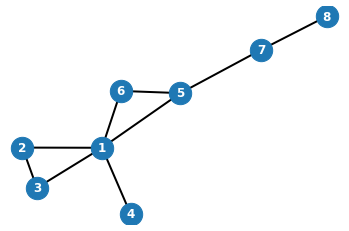

In [23]:

edge_list = [
    ('1', '2'), 
    ('1', '3'),
    ('1', '4'),
    ('1', '5'),
    ('1', '6'),
    
    ('2', '3'),
    ('5', '6'),
    ('7', '5'),
    ('7', '8')
]

G = create_undirected_graph(edge_list)
cc = nx.closeness_centrality(G)

# |node| / path
print('Closeness nx \n', cc)

# path / |node|
print('Closeness manualy \n', 1/np.array(list(cc.values())))

print('Betweeness \n', nx.betweenness_centrality(G, normalized=False))



## 2. Clustering coefficient


Number of Nodes,  5
Number of Edges,  7
Avg of Degree,  2.8
{'a': 0.5, 'b': 1.0, 'c': 0.5, 'd': 1.0, 'e': 1.0}


0.8

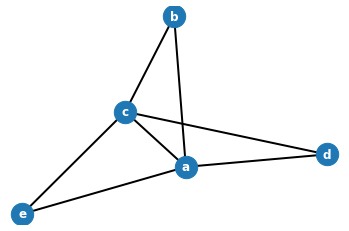

In [24]:
edge_list = [
    ('a', 'b'), 
    ('a', 'c'),
    ('a', 'd'),
    ('a', 'e'),
    
    ('b', 'c'),
    ('c', 'd'),
    ('c', 'e'),
]

G = create_undirected_graph(edge_list)

# nx.clustering(G, 'a')

# Clustering coefficient of all nodes
clust_coefficients = nx.clustering(G)
print(clust_coefficients)

# avg
sum(clust_coefficients.values()) / len(clust_coefficients)
    

## 3. Betweeness Centrality for edges

Number of Nodes,  7
Number of Edges,  9
Avg of Degree,  2.5714285714285716


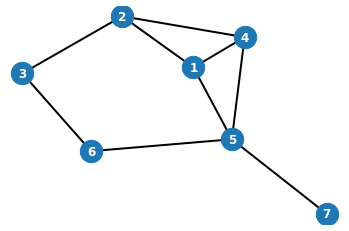

In [92]:
edge_list = [
    ('1', '2'), 
    ('1', '4'),
    ('1', '5'),
    ('2', '3'),
    ('2', '4'),
    ('3', '6'),
    ('4', '5'),
    ('5', '6'),
    ('5', '7')
]

G = create_undirected_graph(edge_list)


In [93]:
nx.edge_betweenness_centrality(G, normalized=False)


{('1', '2'): 3.0,
 ('1', '4'): 1.0,
 ('1', '5'): 4.0,
 ('2', '3'): 4.0,
 ('2', '4'): 3.0,
 ('4', '5'): 4.0,
 ('5', '6'): 6.0,
 ('5', '7'): 6.0,
 ('3', '6'): 4.0}

In [27]:
source = ['d', 'e', 'f', 'g']
target = ['d', 'e', 'f', 'g']

nx.edge_betweenness_centrality_subset(G, source, target, normalized=False)


{('a', 'b'): 0.0,
 ('a', 'c'): 0.0,
 ('b', 'c'): 0.0,
 ('b', 'd'): 0.0,
 ('d', 'e'): 1.5,
 ('d', 'f'): 1.0,
 ('d', 'g'): 1.5,
 ('e', 'f'): 1.5,
 ('f', 'g'): 1.5}

## girvan_newman algorithm

In [95]:

cal_community(G)


[['5', '4', '7', '1', '2'], ['3', '6']]

## 4. Modularity

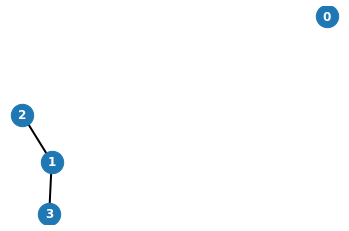

In [49]:

G = nx.empty_graph(n=4, create_using=nx.Graph())

G.add_edges_from([(1, 2), (1, 3)])

plot(G)


In [50]:

nx.modularity_matrix(G)


matrix([[ 0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  , -1.  ,  0.5 ,  0.5 ],
        [ 0.  ,  0.5 , -0.25, -0.25],
        [ 0.  ,  0.5 , -0.25, -0.25]])

In [51]:

nx_comm.modularity(G, [{0, 1}, {2, 3}]), 



(-0.5,)

## 5. Eigen Centrality


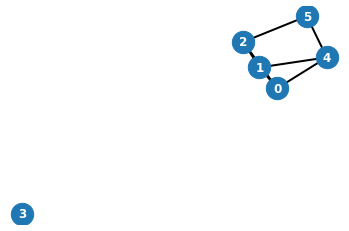

In [73]:
edge_list = [
    (0, 1),(0, 2),(0, 4),
    (1, 2),(1, 4),
    (2, 5),
    (4, 5)
]

G = nx.empty_graph(n=6, create_using=nx.Graph())
G.add_edges_from(edge_list)
plot(G)


In [74]:
cal_adj_matrix(G)


matrix([[0, 1, 1, 0, 1, 0],
        [1, 0, 1, 0, 1, 0],
        [1, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 1],
        [0, 0, 1, 0, 1, 0]])

In [75]:
print('degree c normalized, \n', nx.degree_centrality(G))
print('degree c', np.array(list(nx.degree_centrality(G).values())) * (G.number_of_edges() - 1))

print('\n')

# print('in degree c normalized, \n', nx.in_degree_centrality(G))
# print('in degree c, ', np.array(list(nx.in_degree_centrality(G).values())) * (G.number_of_edges() - 1))



degree c normalized, 
 {0: 0.6000000000000001, 1: 0.6000000000000001, 2: 0.6000000000000001, 3: 0.0, 4: 0.6000000000000001, 5: 0.4}
degree c [3.6 3.6 3.6 0.  3.6 2.4]




In [76]:

nx.eigenvector_centrality(G)


{0: 0.49122201059320597,
 1: 0.49122201059320597,
 2: 0.4557987441346209,
 3: 1.6134046192581886e-07,
 4: 0.4557987441346209,
 5: 0.3192129106225423}

## 6. Page Rank


Number of Di Nodes,  3
Number of Di Edges,  4
Avg of Degree,  2.6666666666666665
page_rank_scores nx,  {'B': 0.387789442707259, 'A': 0.21481051315058508, 'C': 0.3974000441421556}


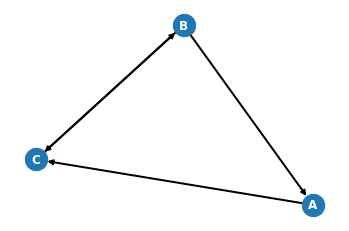

In [88]:

di_edge_list = [
    ('B', 'A'), ('B', 'C'),
    ('A','C'), ('C','B')
]
G = create_directed_graph(di_edge_list)

rank_scores = nx.pagerank(G, alpha=0.85)
print('page_rank_scores nx, ', rank_scores)


In [89]:

print('in degree c normalized, \n', nx.in_degree_centrality(G))


in degree c normalized, 
 {'B': 0.5, 'A': 0.5, 'C': 1.0}


## undirected graph

Number of Nodes,  7
Number of Edges,  8
Avg of Degree,  2.2857142857142856
2 6 0.5
6 1 0.25
1 4 0.5833333333333333
2 5 1.0


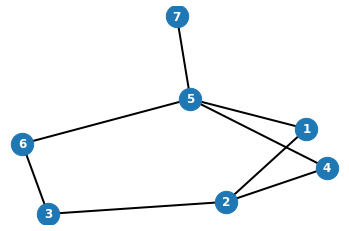

In [99]:
# 
edge_list = [
    (1, 2), 
    (1, 5),
    (2, 3),
    (2, 4),
    (3, 6),
    (4, 5),
    (5, 6),
    (5, 6),
    (5, 7)
]
G = create_undirected_graph(edge_list)

# rank_scores = nx.pagerank(G, alpha=0.85)
# rank_scores_raw = np.array(list(rank_scores.values()))*G.number_of_nodes()

# print('rank_scores nx, \n', rank_scores)
# print('pagerank manually, \n', rank_scores_raw)

preds =nx.resource_allocation_index(G, [(2, 6), (6, 1), (1, 4), (2, 5)])

for u, v, p in preds:
    print(u, v, p)
    

# Recommendation Similarity

In [34]:
## Cosine Distance
def d_cosine(v1, vlist):
    v1 = np.array(v1)
    vlist = np.array(vlist)

    theta = []

    for v in vlist:    
        t = (v1 @ v) / np.linalg.norm(v1) / np.linalg.norm(v)       
        theta.append(t)
    
    return theta


def d_euclidian(v1, vlist):
    v1 = np.array(v1)
    vlist = np.array(vlist)

    theta = []
    for v in vlist: 
        theta.append(np.linalg.norm(v1-v))

    return theta, 1/(1+np.array(theta)**2)



def d_manhattan(v1, vlist):
    v1 = np.array(v1)
    vlist = np.array(vlist)

    theta = []
    for v in vlist:
        theta.append(np.sum(np.abs(v1-v)))
    return theta
    


the equation for measuring similarity based on Pearson Correlation

$$
sim(a, b) = \frac{\sum_{m\in M} (r_{a, m} - \overline r_a)(r_{b, m} - \overline r_b)}{\sqrt{\sum_{m\in M} (r_{a, m} - \overline r_a)^2}\sqrt{\sum_{m\in M} (r_{b, m} - \overline r_b)^2}}
$$

- $r_{a,m}$ = rating of user $a$ for item $m$ 

- $\overline r_a$ = the average rating of user $a$


In [35]:
def d_pearson(matrix, idx):
    vlist = np.array(matrix)
    v1 = vlist[idx]

        
    theta=[]
    for v2 in vlist:
        m1 = np.sum(v1) / len(v1[v1 != 0])
        m2 = np.sum(v2) / len(v2[v2 != 0])

        d1 = np.array([v - m1 if v != 0 else v for v in v1 ])
        d2 = np.array([v - m2 if v != 0 else v for v in v2 ])

        s=np.sum(d1*d2) / np.sqrt(np.sum(d1**2)) / np.sqrt(np.sum(d2**2))
        theta.append(s) 

    return theta


make a prediction 

$$
pred(a, p) = \overline r_a + \frac{\sum_{u \in U} sim(a, u)*(r_{u,p} - \overline r_u)}{\sum_{u \in U} sim(a, u)}
$$

In [36]:
def makePrediction(matrix, aidx, midx, simi_func='cos', k=-1):
    '''
    simi_func: cos/pearson
    '''
    matrix = np.array(matrix)

    if simi_func == 'cos':
        me = matrix[aidx]
        similarity = d_cosine(me, matrix)
    if simi_func == 'pearson':
        similarity = d_pearson(matrix, aidx)
    
    avg_score_user = [np.sum(score_user) / len(score_user[score_user != 0]) for score_user in matrix ]
    score_m = matrix[:, midx] 

    avg_score_b = np.delete(avg_score_user, aidx)
    simi_b = np.delete(similarity, aidx)    
    score_m_b = np.delete(score_m, aidx)

    print('avg score user', avg_score_user)
    print('score of m', score_m)
    print('user simi', similarity)

    diff_score=[s - avg_score_b[i] if s > 0 else s for (i,s) in enumerate( score_m_b)]
    diff_simi=[ simi_b[i] if s > 0 else 0 for (i,s) in enumerate(score_m_b)]
    
    v = np.sum(np.multiply(simi_b, diff_score)) / np.sum(diff_simi)
    print(v)

    return avg_score_user[aidx] + v
    


In [37]:
makePrediction([
    [2.5,3.5,3.0,2.5],
    [2.5,3.0,0,0],
    [0,3.5,3.0,2.5],
    [3.0,4.5,0,1.0]
], 1, 3, simi_func='cos')


avg score user [2.875, 2.75, 3.0, 2.8333333333333335]
score of m [2.5 0.  2.5 1. ]
user simi [0.738317225479803, 1.0000000000000002, 0.5127291752509333, 0.9777361740330238]
-1.043506842064868


1.706493157935132

In [3]:
def sgd_factorise_masked(A: torch.Tensor, M: torch.Tensor, rank: int, num_epochs=1000, lr=0.01) -> Tuple[torch.Tensor, torch.Tensor]:
    m, n = A.shape

    U = torch.rand((m, rank))
    V = torch.rand((n, rank))

    for i in range(num_epochs):
        for r in range(m):
            for c in range(n):
                if M[r, c]:
                    e = A[r, c] - U[r] @ V[c].T
                    U[r] = U[r] + lr * e * V[c]
                    V[c] = V[c] + lr * e * U[r]

    return U, V

A=torch.tensor([
    [2.5, 3.5,3.0,2.5],
    [2.5, 3.0,0.0,0.0],
    [0.0,3.5,3.0,2.5],
    [3.0,4.5,0.0,1.0]
])

M = torch.tensor([
    [1, 1, 1, 1],
    [1, 1, 0, 0,],
    [0, 1, 1, 1],
    [1, 1, 0, 1]
])

U, V = sgd_factorise_masked(A, M, 2)

A_Complete = U @ V.T

A_Complete


tensor([[2.5944, 3.4445, 2.9878, 2.5006],
        [2.2763, 3.1512, 2.3029, 1.4631],
        [2.6269, 3.4934, 3.0110, 2.4993],
        [3.0845, 4.4438, 2.6913, 0.9974]])

In [118]:
d_cosine(
    [3,8,7,5],
    [
        [10,8,6,6]
    ]
)


[0.8912374332033542]

In [119]:
d_euclidian(
    [1.5, 1.5],
            
    [
        [2, 1]
    ]
)
            

[0.7071067811865476]

In [120]:
d_manhattan(
    [3, 8],
    [
        [10, 8]
    ]
)

[7]

In [121]:
d_pearson([
    [8,2,5,7,1,8],
    [0,0,4,1,7,3],
    [0,5,7,7,4,8],
    [2,7,4,3,6,3],
    [7,5,7,8,5,7]
], 2)


[0.8626056877614031,
 -0.7378647873726218,
 1.0,
 -0.7432422527106193,
 0.8444444444444444]